In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("appliance_energy.csv")

In [ ]:
df

,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201
...,...,...
95,24.875912,2.079686
96,25.454657,2.506915
97,23.550820,2.525658
98,15.508383,1.689184


In [ ]:
df.corr()

,Temperature (°C),Energy Consumption (kWh)
Temperature (°C),1.000000,0.759292
Energy Consumption (kWh),0.759292,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (°C)          100 non-null    float64
 1   Energy Consumption (kWh)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
df.describe()

,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


In [ ]:
df.columns

Index(['Temperature (°C)', 'Energy Consumption (kWh)'], dtype='object')

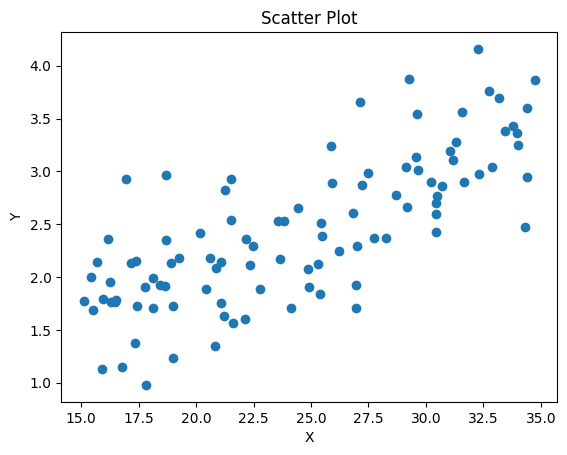

In [ ]:
x = df['Temperature (°C)']
y = df['Energy Consumption (kWh)']
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.show()

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
x_train

,Temperature (°C)
43,33.186408
62,31.574750
3,26.973170
71,18.974314
45,28.250446
...,...
96,25.454657
67,31.043940
64,20.618690
47,25.401360


In [ ]:

print(f"Length of x_train: {len(x_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of x_test: {len(x_test)}")
print(f"Length of y_test: {len(y_test)}")



Length of x_train: 80
Length of y_train: 80
Length of x_test: 20
Length of y_test: 20


In [ ]:
if isinstance(x_train, np.ndarray):
    x_train = x_train.reshape(-1, 1)
elif isinstance(x_train, pd.Series):
    x_train = x_train.to_frame()
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.squeeze()

In [ ]:


model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.08656458])

In [ ]:
model.intercept_

0.33738755129308107

In [ ]:
model.predict([[20]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.0686791])

In [ ]:
if isinstance(x_test, np.ndarray):
    x_test = x_test.reshape(-1, 1)
elif isinstance(x_test, pd.Series):
    x_test = x_test.to_frame()

# Ensure y_test is 1-dimensional
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.squeeze()


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy = model.score(x_train, y_train)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5624881923239835


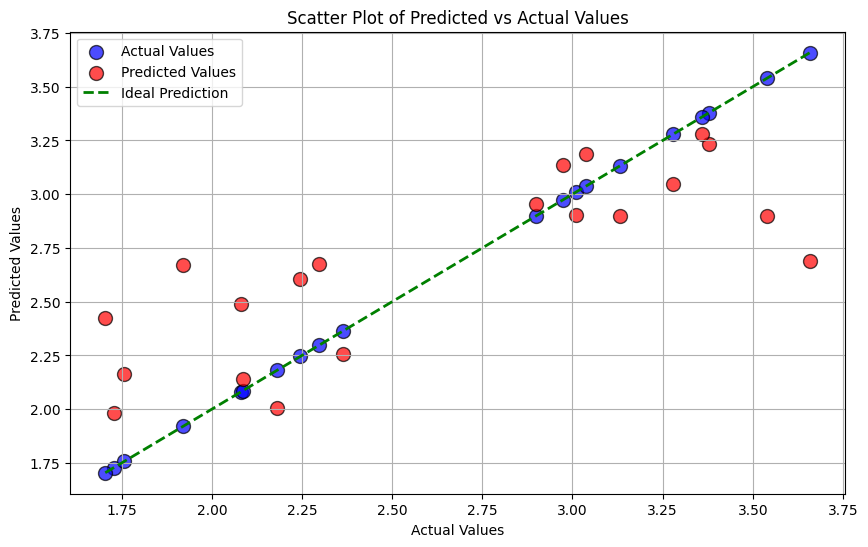

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='blue', edgecolor='k', alpha=0.7, s=100, label='Actual Values')
plt.scatter(y_test, y_pred, color='red', edgecolor='k', alpha=0.7, s=100, label='Predicted Values')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', linewidth=2, label='Ideal Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.grid(True)
plt.legend()
plt.show()